# Setting up google colab

In [1]:
import kagglehub

# Download latest version

path = kagglehub.dataset_download("prachi13/customer-analytics")

print("Path of the files: ", path)

Path of the files:  /kaggle/input/customer-analytics


In [2]:
import pandas as pd

df_customer_analytics = pd.read_csv("/kaggle/input/customer-analytics/Train.csv")
df_customer_analytics.shape

(10999, 12)

# Task 1 - Query Generation

In [3]:
df_customer_analytics.head(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
9,10,B,Flight,3,2,164,3,medium,F,29,1187,1


## Question 1: Which mode of shipment is the most reliable in terms of on-time delivery?

What is the distribution  of shipment modes used?

In [6]:
on_time_rates = df_customer_analytics.groupby('Mode_of_Shipment')['Reached.on.Time_Y.N'].mean().sort_values(ascending=False)
print(on_time_rates)

Mode_of_Shipment
Flight    0.601576
Ship      0.597561
Road      0.588068
Name: Reached.on.Time_Y.N, dtype: float64


In [7]:
print("Flight is the most reliable mode of on-time delivery")

Flight is the most reliable mode of on-time delivery


It groups data by `Mode_of_Shipment` and calculate the on-time delivery percentage for each. It outputs sorted list showing which mode has the highest success rate.

## Question 2: Does the stated importance of a product influence its likelihood of arriving on time?

In [9]:
importance_impact = df_customer_analytics.groupby('Product_importance')['Reached.on.Time_Y.N'].mean().sort_values(ascending=False)
print(importance_impact)

Product_importance
high      0.649789
low       0.592788
medium    0.590450
Name: Reached.on.Time_Y.N, dtype: float64


It aggregates data by `Product_importance` to find the on-time delivery rate for each category. The result will show whether high-importance products are prioritized and have a better on-time delivery record compared to low-importance ones.

## Question 3: How does the number of customer care calls correlate with the final customer rating?

In [11]:
rating_vs_calls = df_customer_analytics.groupby('Customer_care_calls')['Customer_rating'].mean()
print(rating_vs_calls)

Customer_care_calls
2    3.017241
3    2.959901
4    2.998032
5    2.972938
6    3.083909
7    2.995935
Name: Customer_rating, dtype: float64


It groups shipments by the number of `Customer_care_calls` made and computes the average Customer_rating for each group.

There is no particular trend or correlation detected.

## Question 4: Are heavier products given higher discounts, possibly to offset shipping costs or incentivize purchase?

In [14]:
correlation = df_customer_analytics['Weight_in_gms'].corr(df_customer_analytics['Discount_offered'])
print(f"Correlation between Weight and Discount: {correlation}")

Correlation between Weight and Discount: -0.37606671513805257


It computes the Pearson correlation coefficient between product `Weight_in_gms` and `Discount_offered`. The output is a single numerical value between -1 and 1.

**`Moderate Negative Correlation` As the increase in weight happens a moderate decrease in discounts occur!**

## Question 5: Which warehouse block has the highest proportion of delayed shipments?

In [15]:
late_shipment_rate = 1 - df_customer_analytics.groupby('Warehouse_block')['Reached.on.Time_Y.N'].mean()
print(late_shipment_rate.sort_values(ascending=False))

Warehouse_block
A    0.413530
C    0.403164
D    0.402399
F    0.401528
B    0.397709
Name: Reached.on.Time_Y.N, dtype: float64


The code determines the late delivery rate for each `Warehouse_block` ('A', 'B', 'C', 'D', 'F').

Currently Warehouse 'A' has the highest proportions of the delayed shipments.

## Question 6: Does offering a substantial discount (suppose >10%) correlate with a better on-time delivery rate?

In [16]:
#Creating a binary column
df_customer_analytics['High_Discount'] = df_customer_analytics['Discount_offered'] > 10

discount_effect = df_customer_analytics.groupby('High_Discount')['Reached.on.Time_Y.N'].mean()
print(discount_effect)

High_Discount
False    0.46887
True     1.00000
Name: Reached.on.Time_Y.N, dtype: float64


- For shipments with a discount of 10% or less, only about 46.9% arrived on time.

- For shipments with a discount greater than 10%, 100% arrived on time.

## Question 7: Are customers with a high number of prior purchases more likely to recieve their orders on time?

In [17]:
loyalty_service_level = df_customer_analytics.groupby('Prior_purchases')['Reached.on.Time_Y.N'].mean().sort_index()
print(loyalty_service_level)

Prior_purchases
2     0.625240
3     0.640708
4     0.543387
5     0.498834
6     0.559715
7     0.676471
8     0.648438
10    0.573034
Name: Reached.on.Time_Y.N, dtype: float64


It investigates whether the company prioritizes customer loyalty. It groups the data by the `Prior_purchases` column and calculates the on-time delivery rate for each value. The output will reveal if the delivery success rate increases as the number of prior purchases goes up, indicating better service for loyal customers

## Question 8: Are there significant differences in the average product cost and discounts recieved between male and female customers?

In [18]:
gender_analysis = df_customer_analytics.groupby('Gender').agg(
    Average_Cost=('Cost_of_the_Product', 'mean'),
    Average_Discount=('Discount_offered', 'mean')
)
print(gender_analysis)

        Average_Cost  Average_Discount
Gender                                
F         209.255005         13.562489
M         211.154382         13.180785


It provides a demographic breakdown of purchasing behavior. The .agg() function efficiently calculates both the average product cost and average discount for 'M' and 'F' `Gender` categories in a single table. It shows if any bias exists in gender basis dividend.

## Question 9: How does on-time delivery performance across different product weight cateogories?

In [21]:
bins = [0, 2000, 5000, float('inf')]
labels = ['Light (<2kg)', 'Medium (2-5kg)', 'Heavy (>5kg)']
df_customer_analytics['Weight_Category'] = pd.cut(df_customer_analytics['Weight_in_gms'], bins=bins, labels=labels, right=False)

weight_performance = df_customer_analytics.groupby('Weight_Category')['Reached.on.Time_Y.N'].mean()
print(weight_performance)

Weight_Category
Light (<2kg)      0.677877
Medium (2-5kg)    0.643709
Heavy (>5kg)      0.426745
Name: Reached.on.Time_Y.N, dtype: float64


/tmp/ipython-input-2574847916.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weight_performance = df_customer_analytics.groupby('Weight_Category')['Reached.on.Time_Y.N'].mean()


This query segments products by weight to see if logistics are optimized differently for light versus heavy items. The `pd.cut` function creates distinct weight classes. The output will show the on-time delivery rate for each class, highlighting potential bottlenecks or efficiencies in handling products of different weights.

There is a direct correlation between `Weight_Cateogry` and the `Reached.on.Time_Y.N`. As the weight increases, delays in the on-time delivery starts happening!

## Question 10: Are the most expensive products prioritized for a on-time delievery compared to the least expansive ones?

In [22]:
df_customer_analytics['Cost_Quartile'] = pd.qcut(df_customer_analytics['Cost_of_the_Product'], q=4, labels=['Q1_Lowest', 'Q2', 'Q3', 'Q4_Highest'])

value_priority = df_customer_analytics.groupby('Cost_Quartile')['Reached.on.Time_Y.N'].mean()
print(value_priority)

Cost_Quartile
Q1_Lowest     0.643402
Q2            0.611534
Q3            0.575465
Q4_Highest    0.555844
Name: Reached.on.Time_Y.N, dtype: float64


/tmp/ipython-input-3975622890.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  value_priority = df_customer_analytics.groupby('Cost_Quartile')['Reached.on.Time_Y.N'].mean()


The `pd.qcut` function is used to create four robust cost brackets (quartiles). The result will compare the on-time delivery rates across these brackets, clearly showing if higher-value goods (Q4_Highest) receive preferential treatment in the supply chain.

The results show:
- Lower-cost shipments (Q1_Lowest) have the highest on-time delivery rate (64.3%).

- Highest-cost shipments (Q4_Highest) have the lowest on-time delivery rate (55.6%)

**CONCLUSION: As the monetary value increases, the on-time delivery decreases!**

# Task 2 - Exploratory Data Analysis (EDA)

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io

Defining cateogorical and numerical features for easier plotting

In [4]:
numerical_features = ["Customer_care_calls", "Customer_rating", "Cost_of_the_Product", "Prior_purchases", "Discount_offered", "Weight_in_gms"]
categorical_features = ["Warehouse_block", "Mode_of_Shipment", "Product_importance", "Gender", "Reached.on.Time_Y.N"]

### Univariate analysis

#### Pie Chart (For categorial feature proportions)

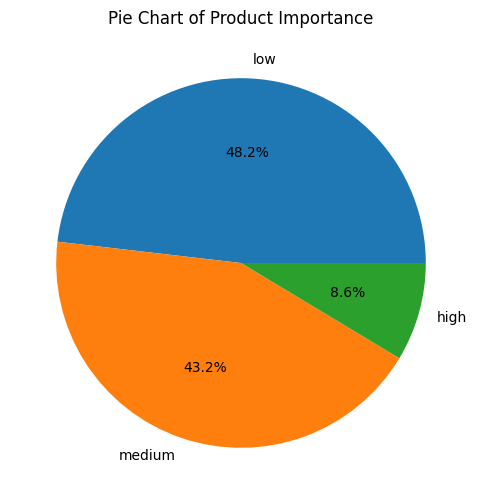

In [10]:
df_customer_analytics['Product_importance'].value_counts().plot.pie(autopct="%1.1f%%", figsize=(6,6))
plt.title("Pie Chart of Product Importance")
plt.ylabel("")
plt.show()

#### Box plot (For numerical feature distribution)

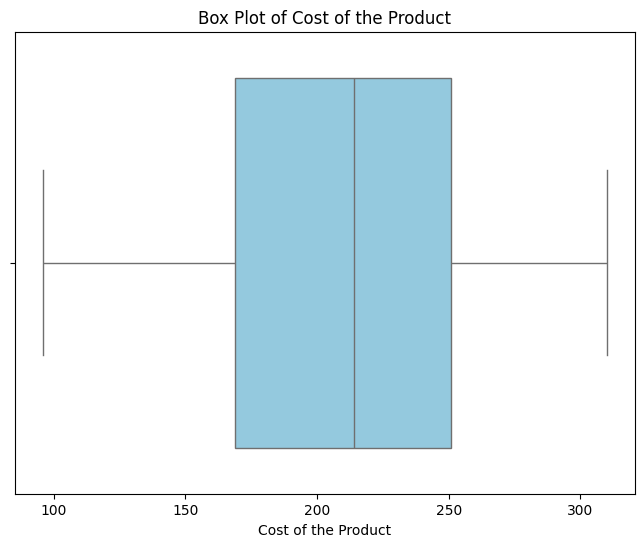

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_customer_analytics['Cost_of_the_Product'], color='skyblue')
plt.title('Box Plot of Cost of the Product')
plt.xlabel('Cost of the Product')
plt.show()

#### Count plot (For categorical feature frequency)

/tmp/ipython-input-3206310806.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Warehouse_block', data=df_customer_analytics, palette='plasma')


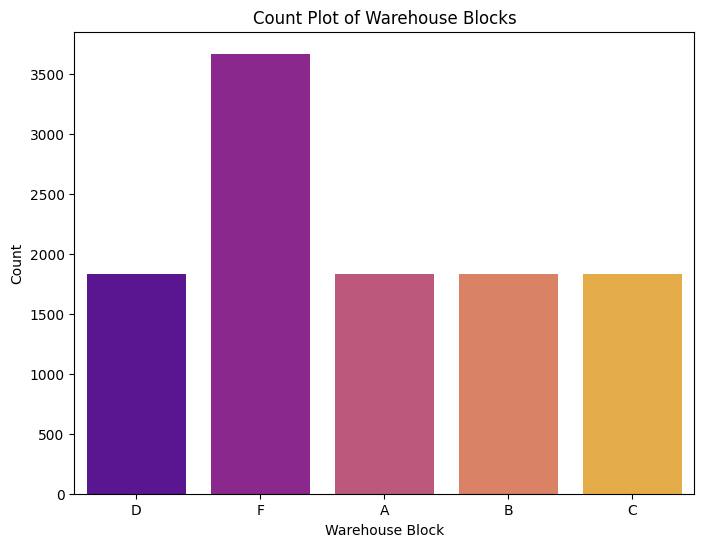

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Warehouse_block', data=df_customer_analytics, palette='plasma')
plt.title('Count Plot of Warehouse Blocks')
plt.xlabel('Warehouse Block')
plt.ylabel('Count')
plt.show()

#### Histogram (For numerical feature distribution)

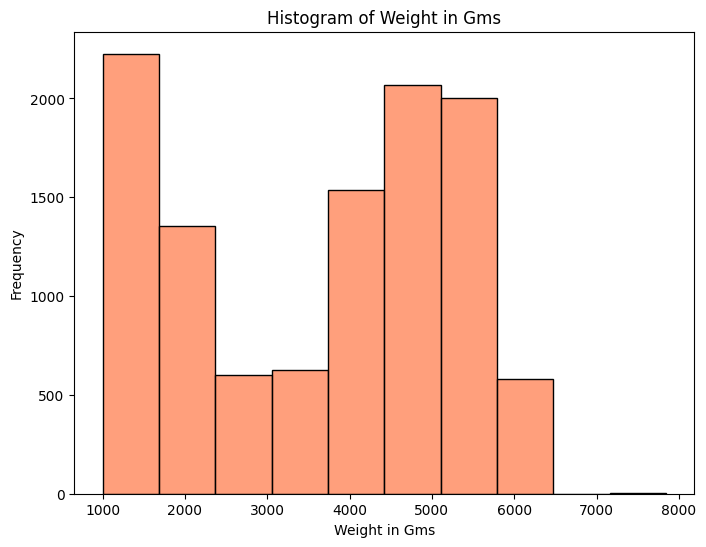

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(df_customer_analytics['Weight_in_gms'], kde=False, bins=10, color='coral')
plt.title('Histogram of Weight in Gms')
plt.xlabel('Weight in Gms')
plt.ylabel('Frequency')
plt.show()

#### KDE Plot (Kernel Density Estimate for numerical feature)

/tmp/ipython-input-1315582390.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_customer_analytics['Discount_offered'], shade=True, color='g')


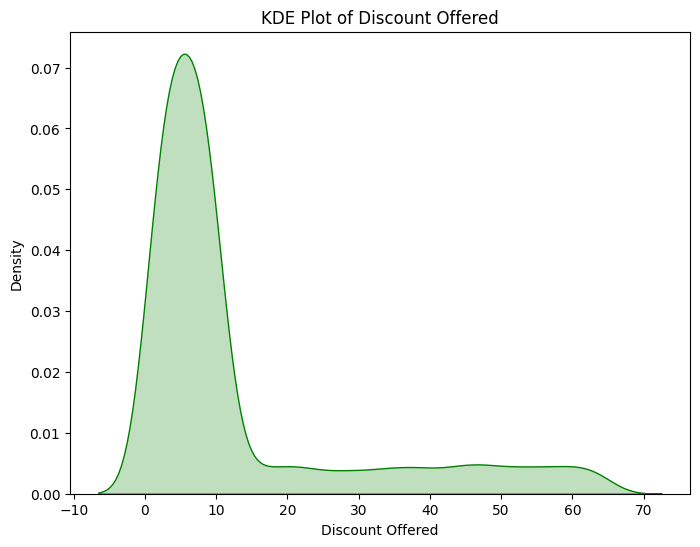

In [18]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df_customer_analytics['Discount_offered'], shade=True, color='g')
plt.title('KDE Plot of Discount Offered')
plt.xlabel('Discount Offered')
plt.ylabel('Density')
plt.show()

### Bi-Variate analysis

#### Correlational Heatmap (Numerical v/s Numerical)

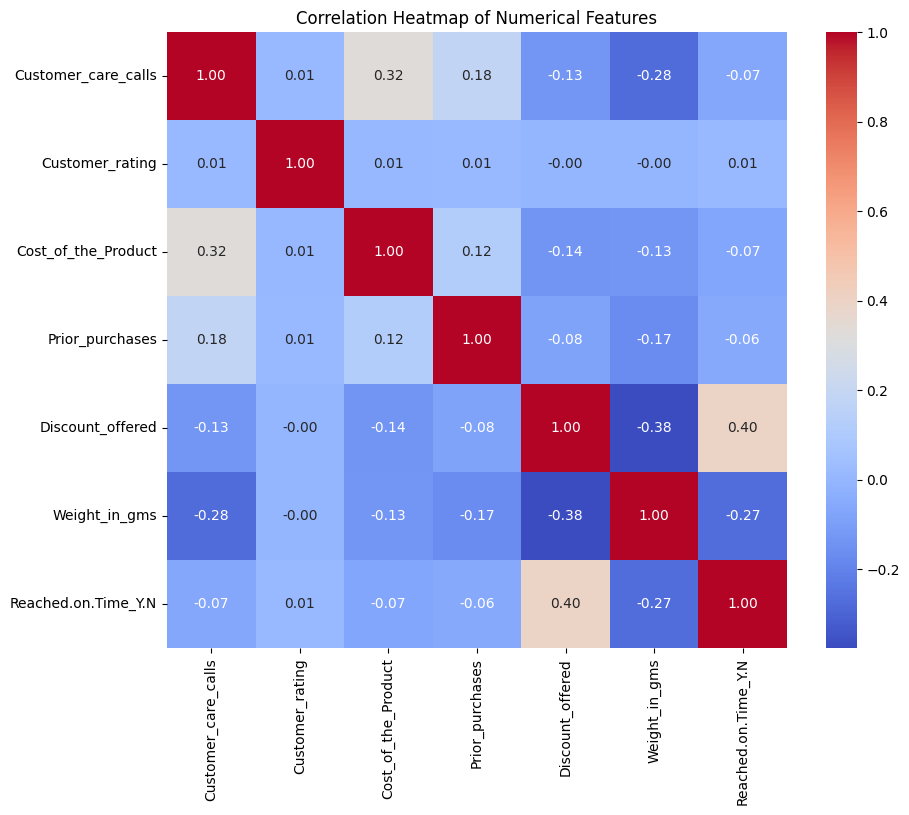

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_customer_analytics[numerical_features + ["Reached.on.Time_Y.N"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

#### Bar Plot (Categorical v/s Numerical)

/tmp/ipython-input-4244409026.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mode_of_Shipment', y='Cost_of_the_Product', data=df_customer_analytics, palette='magma')


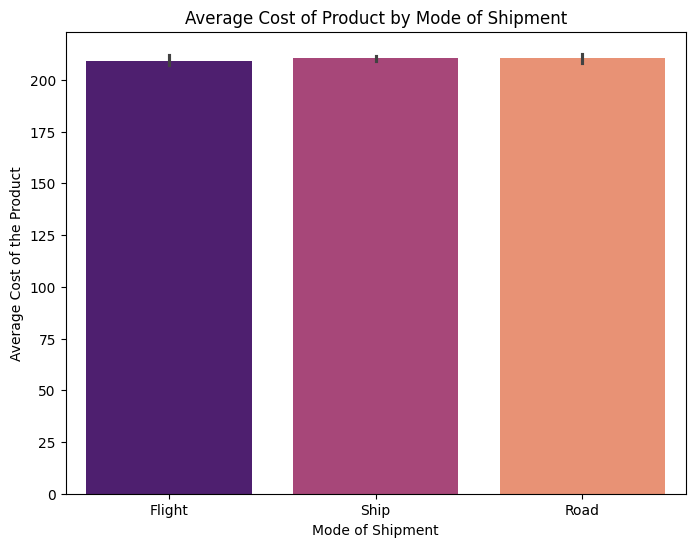

In [22]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Mode_of_Shipment', y='Cost_of_the_Product', data=df_customer_analytics, palette='magma')
plt.title('Average Cost of Product by Mode of Shipment')
plt.xlabel('Mode of Shipment')
plt.ylabel('Average Cost of the Product')
plt.show()

#### Violin Plot (Categorical V/S Numerical distribution)

/tmp/ipython-input-1420869886.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Product_importance', y='Weight_in_gms', data=df_customer_analytics, palette='Set2')


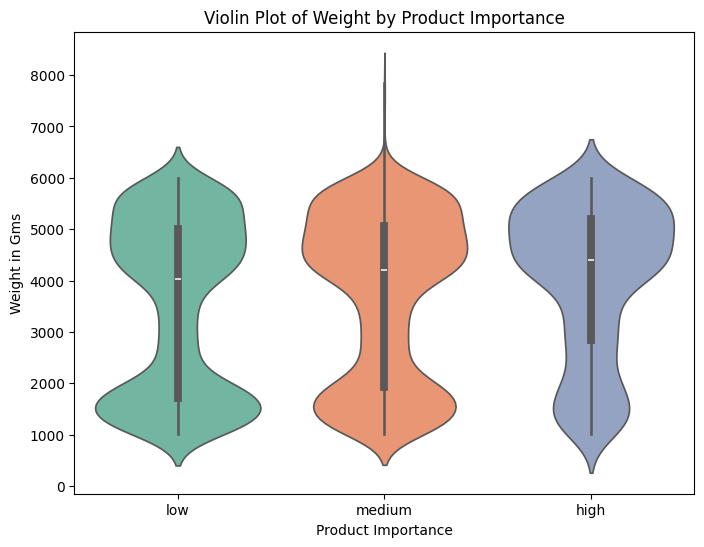

In [23]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Product_importance', y='Weight_in_gms', data=df_customer_analytics, palette='Set2')
plt.title('Violin Plot of Weight by Product Importance')
plt.xlabel('Product Importance')
plt.ylabel('Weight in Gms')
plt.show()

#### Line Plot (Numerical V/S Numerical (Sequence))

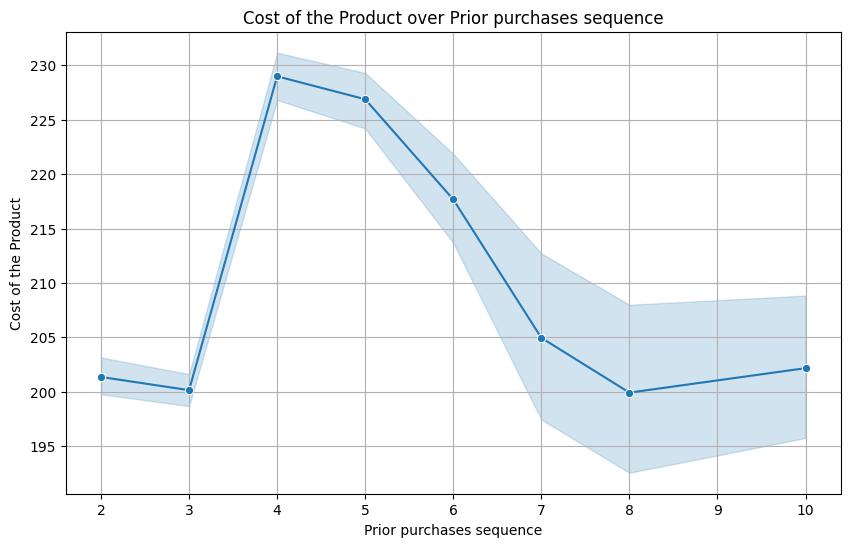

In [25]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Prior_purchases', y='Cost_of_the_Product', data=df_customer_analytics.sort_values('Prior_purchases'), marker='o')
plt.title('Cost of the Product over Prior purchases sequence')
plt.xlabel('Prior purchases sequence')
plt.ylabel('Cost of the Product')
plt.grid(True)
plt.show()

#### Scatter Plot (Numerical V/S Numerical)

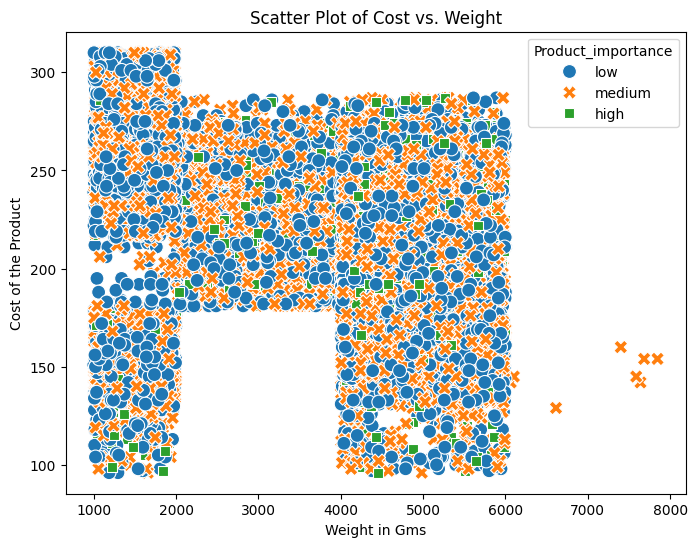

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Weight_in_gms', y='Cost_of_the_Product', data=df_customer_analytics, hue='Product_importance', style='Product_importance', s=100)
plt.title('Scatter Plot of Cost vs. Weight')
plt.xlabel('Weight in Gms')
plt.ylabel('Cost of the Product')
plt.show()

#### Bar plot

/tmp/ipython-input-159187341.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Gender', y='Prior_purchases', data=df_customer_analytics, estimator=sum, palette='pastel', ci=None)
/tmp/ipython-input-159187341.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Prior_purchases', data=df_customer_analytics, estimator=sum, palette='pastel', ci=None)


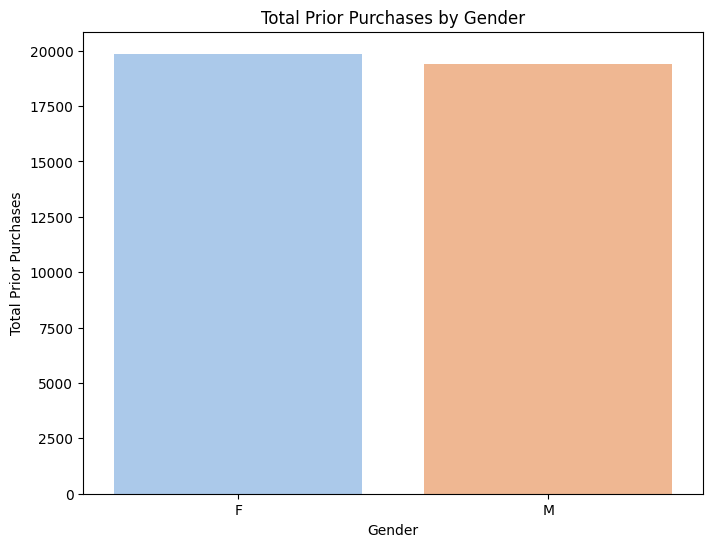

In [28]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Prior_purchases', data=df_customer_analytics, estimator=sum, palette='pastel', ci=None)
plt.title('Total Prior Purchases by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Prior Purchases')
plt.show()

#### Stacked Bar Plot (Cateogrical V/S Categorical)

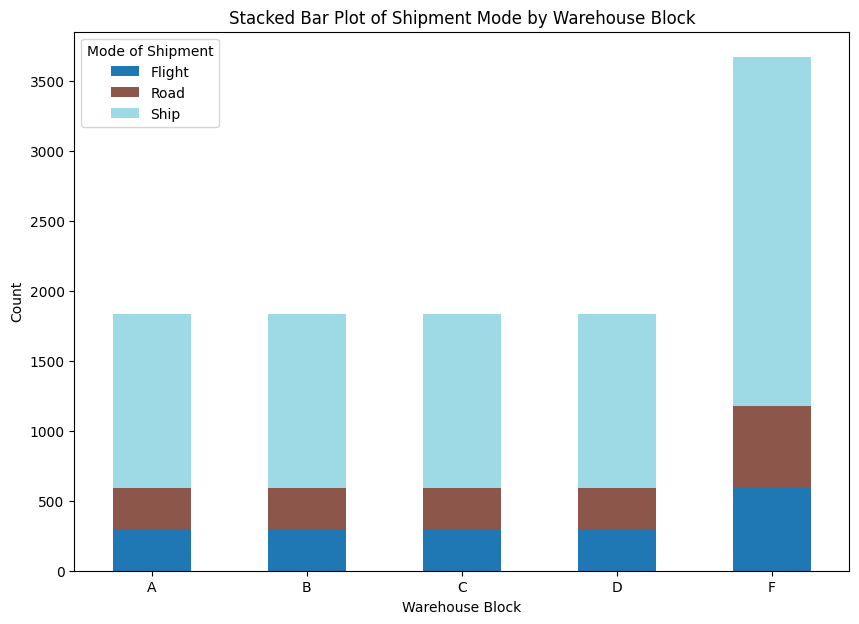

In [29]:
crosstab_df = pd.crosstab(df_customer_analytics['Warehouse_block'], df_customer_analytics['Mode_of_Shipment'])
crosstab_df.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='tab20')
plt.title('Stacked Bar Plot of Shipment Mode by Warehouse Block')
plt.xlabel('Warehouse Block')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Mode of Shipment')
plt.show()

#### Joint Plot (Numerical V/S Numerical with marginal distributions)

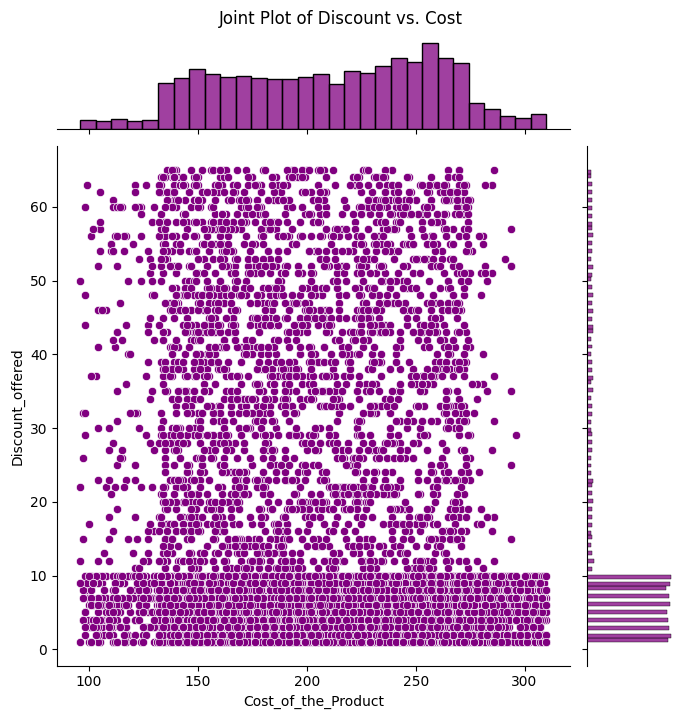

In [31]:
sns.jointplot(x='Cost_of_the_Product', y='Discount_offered', data=df_customer_analytics, kind='scatter', height=7, color='purple')
plt.suptitle('Joint Plot of Discount vs. Cost', y=1.02)
plt.show()

#### Pair Plot (Pairwise relationships for mulitple numerical features)

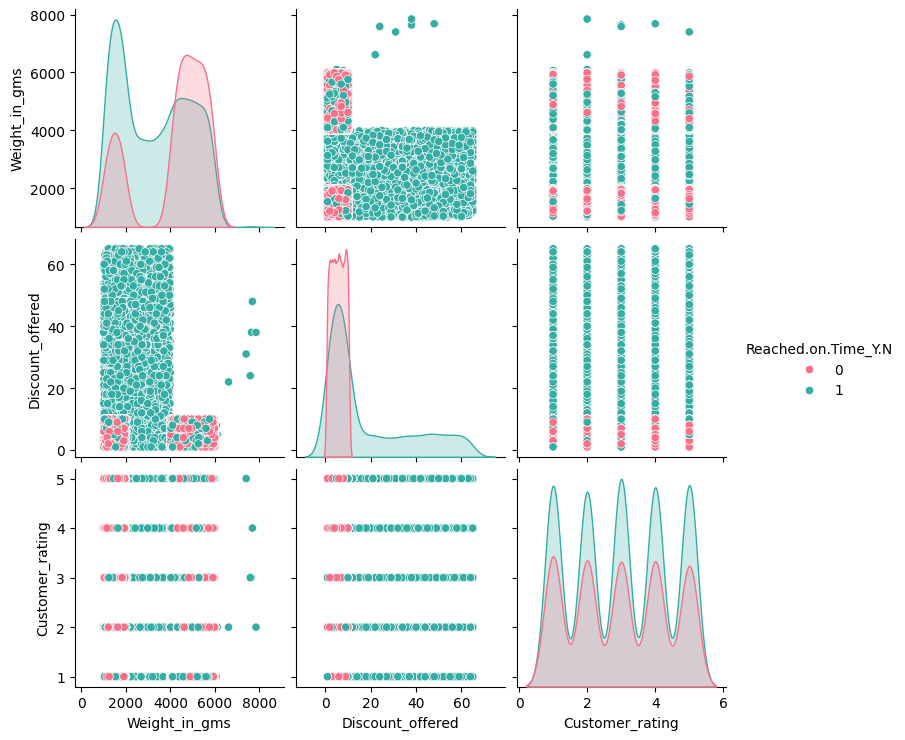

In [35]:
sns.pairplot(df_customer_analytics[['Weight_in_gms','Discount_offered','Customer_rating','Reached.on.Time_Y.N']], hue="Reached.on.Time_Y.N", palette = 'husl')